In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5,0.5))
    #transforms.Normalize([0.485, 0.456, 0.406],[.229, 0.224, 0.225])

])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                       download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                         shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, 
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog',
           'horse', 'ship', 'truck')

0it [00:00, ?it/s]

100%|█████████▉| 170287104/170498071 [01:12<00:00, 2411422.79it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
import matplotlib.pyplot as plt
import numpy as np

170500096it [01:16, 2233178.19it/s]                               


In [4]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

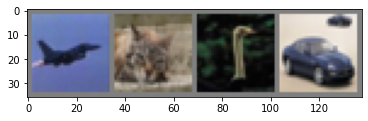

plane   cat  bird   car


In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [7]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    
net = Net()

In [8]:
import torch.optim as optim

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [12]:
for  epoch in range(2):
    
    running_loss = 0.0
    
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print("[%d, %5d] loss: %.3f " % (epoch+1, i+1, running_loss/2000))
            running_loss = 0.0
            
    print("Finised Training")

[1,  2000] loss: 2.233 
[1,  4000] loss: 1.933 
[1,  6000] loss: 1.700 
[1,  8000] loss: 1.605 
[1, 10000] loss: 1.535 
[1, 12000] loss: 1.480 
Finised Training
[2,  2000] loss: 1.400 
[2,  4000] loss: 1.377 
[2,  6000] loss: 1.352 
[2,  8000] loss: 1.323 
[2, 10000] loss: 1.292 
[2, 12000] loss: 1.277 
Finised Training


In [13]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

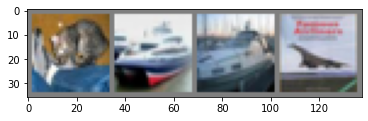

GroudTruth:    cat  ship  ship plane


In [14]:
dataiter =iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print("GroudTruth: ", ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [15]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [16]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print("Predicted: ", ' '.join('%5s' % classes[predicted[j]] for j in range(4)))